In [1]:
# reading the csv file from USGS catalog and do simple visualization
# author - Kaushik Pradhan (kpradhan@miners.utep.edu)
# Last modified - 02/19/2024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap

In [3]:
# read the csv file from a link - magnitude Mw 7.0+ earthquakes from 2017 to today

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2017-01-01%2000:00:00&endtime=2024-02-19%2023:59:59&minmagnitude=7&eventtype=earthquake&orderby=time'
data = pd.read_csv(url)

# print the first 5 rows of the data
print(data.head())

URLError: <urlopen error [Errno 61] Connection refused>

In [ ]:
#give me the general statistics of the data
print(data.describe())

        latitude   longitude       depth        mag         nst        gap  \
count  94.000000   94.000000   94.000000  94.000000   31.000000  92.000000   
mean    1.748422   31.874236  106.581372   7.331915  185.903226  25.815217   
std    29.009186  132.122503  171.380940   0.330270   84.110386  14.532971   
min   -60.284500 -178.345300    6.000000   7.000000   77.000000   8.000000   
25%   -19.905425  -91.304475   18.284750   7.100000  132.500000  16.000000   
50%    -5.756550  114.284450   36.000000   7.300000  146.000000  22.000000   
75%    18.449775  146.490200  120.927500   7.500000  250.500000  32.000000   
max    61.346400  179.457600  670.810000   8.200000  410.000000  82.000000   

            dmin        rms  horizontalError  depthError   magError  \
count  92.000000  94.000000        92.000000   94.000000  91.000000   
mean    2.621806   0.857340         6.677609    2.481074   0.042648   
std     1.946811   0.235249         1.952092    3.127426   0.012279   
min     0.046

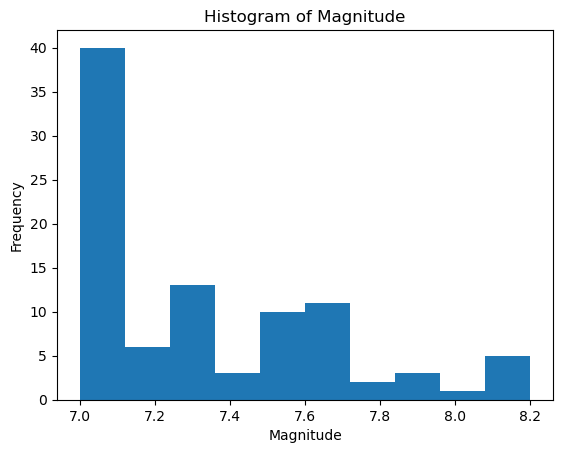

In [ ]:
# plot magnitude as histogram
plt.figure()
plt.hist(data['mag'])
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude')
plt.show()

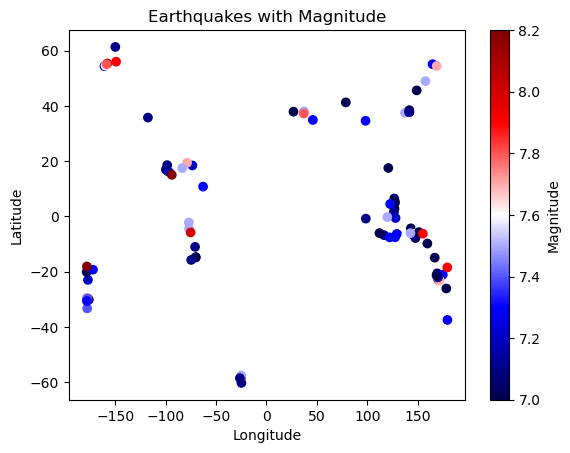

In [ ]:
# since latitude and longitude are in the data, we can plot the earthquakes on a map
plt.figure()
plt.scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquakes with Magnitude')
plt.colorbar(label='Magnitude')
plt.show()

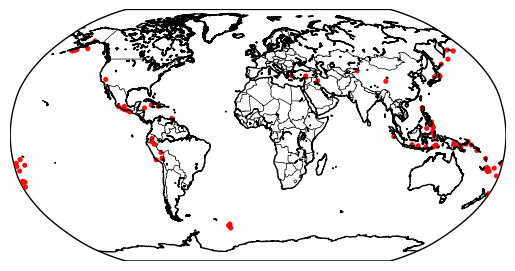

In [ ]:
map = Basemap(projection='robin', resolution='l', lat_0=0, lon_0=0)

map.drawcoastlines()
map.drawcountries()

# Plot the earthquake events as circles
x, y = map(data['longitude'], data['latitude'])
map.scatter(x, y, s=data['mag'], c='red', alpha=0.9)

# Show the map
plt.show()

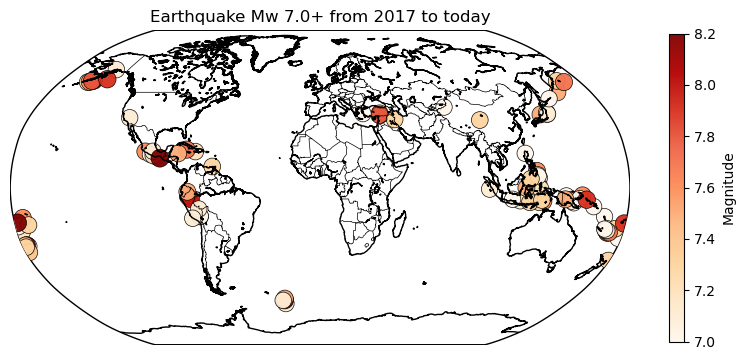

In [ ]:
plt.figure(figsize=(10, 8))
map = Basemap(projection='robin', resolution='l', lat_0=0, lon_0=0)

map.drawcoastlines()
map.drawcountries()

x, y = map(data['longitude'], data['latitude'])
sc = map.scatter(x, y, s=data['mag']*20.0, c=data['mag'], cmap='OrRd', alpha=0.95, edgecolors='k', linewidth=0.5)

plt.title('Earthquake Mw 7.0+ from 2017 to today')

cbar = plt.colorbar(sc, shrink=0.5)
cbar.set_label('Magnitude')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


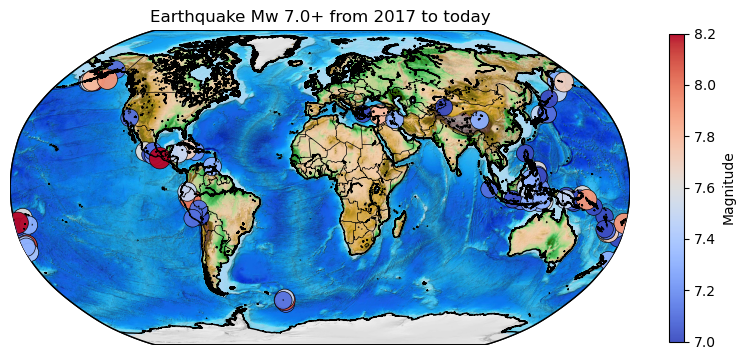

In [ ]:
plt.figure(figsize=(10, 8))

map = Basemap(projection='robin', resolution='i', lat_0=0, lon_0=0) #full resolution

map.drawcoastlines()
map.drawcountries()

map.drawmapboundary(fill_color='aqua')

map.etopo()

x, y = map(data['longitude'], data['latitude'])
sc = map.scatter(x, y, s=data['mag']**2.6, c=data['mag'], cmap='coolwarm', alpha=0.95, edgecolors='k', linewidth=0.5)

plt.title('Earthquake Mw 7.0+ from 2017 to today')

cbar = plt.colorbar(sc, shrink=0.5)
cbar.set_label('Magnitude')

plt.show()

In [ ]:
# read the csv file from a link - magnitude Mw 6.5+ earthquakes from 2017 to today

url_2 = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2017-01-01%2000:00:00&endtime=2024-02-19%2023:59:59&minmagnitude=6.5&eventtype=earthquake&orderby=time'
data_2 = pd.read_csv(url_2)

# get the statistics of the data
print(data_2.describe())

         latitude   longitude       depth         mag         nst         gap  \
count  291.000000  291.000000  291.000000  291.000000   88.000000  288.000000   
mean    -1.792493   29.145200  109.676615    6.883162  176.568182   29.518021   
std     29.504564  126.333522  182.545734    0.381230   80.781498   20.484564   
min    -61.809800 -179.511300    2.700000    6.500000   18.000000    8.000000   
25%    -21.719900  -77.923200   12.000000    6.600000  127.000000   18.000000   
50%     -6.069900   96.644200   26.000000    6.800000  152.000000   23.000000   
75%     16.135800  142.959700   94.500000    7.000000  220.000000   35.000000   
max     71.631200  179.998100  670.810000    8.200000  410.000000  210.000000   

             dmin         rms  horizontalError  depthError    magError  \
count  287.000000  290.000000       286.000000  290.000000  279.000000   
mean     3.436659    0.848713         6.914510    2.126586    0.047563   
std      3.293814    0.228590         1.902191  

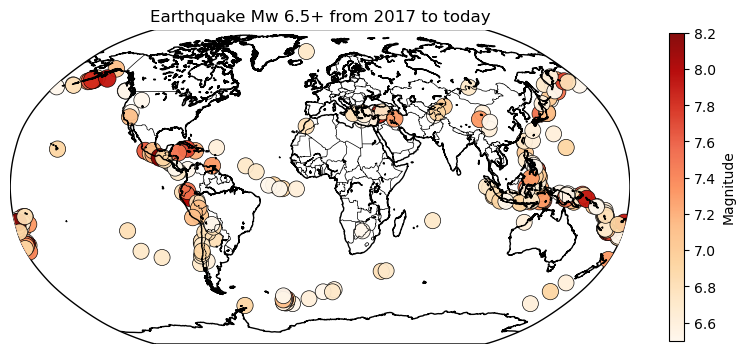

In [ ]:
plt.figure(figsize=(10, 8))
map = Basemap(projection='robin', resolution='l', lat_0=0, lon_0=0)

map.drawcoastlines()
map.drawcountries()

x, y = map(data_2['longitude'], data_2['latitude'])
sc = map.scatter(x, y, s=data_2['mag']*20.0, c=data_2['mag'], cmap='OrRd', alpha=0.95, edgecolors='k', linewidth=0.5)

plt.title('Earthquake Mw 6.5+ from 2017 to today')

cbar = plt.colorbar(sc, shrink=0.5)
cbar.set_label('Magnitude')

plt.show()

<Figure size 1000x800 with 0 Axes>

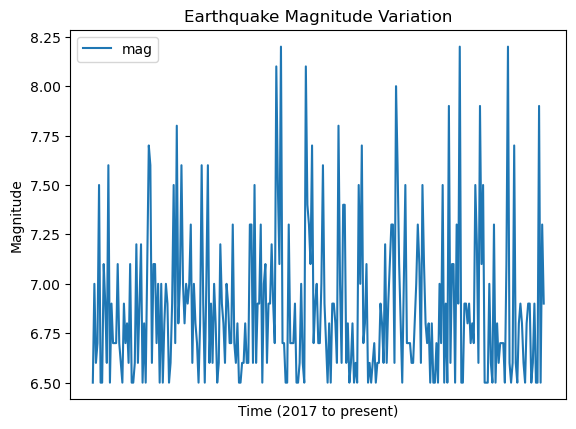

In [ ]:
plt.figure(figsize=(10, 8))
data_2.plot(x='time', y='mag')
plt.xlabel('Time (2017 to present)')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Variation')
plt.xticks([])  # remove the time axis grid values
plt.show()